<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор" data-toc-modified-id="Обзор-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор</a></span></li><li><span><a href="#Проверка-рассчета-эффективности-обогащения" data-toc-modified-id="Проверка-рассчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка рассчета эффективности обогащения</a></span></li><li><span><a href="#анализ-признаков-недоступных--в-тестовой-выборке" data-toc-modified-id="анализ-признаков-недоступных--в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>анализ признаков недоступных  в тестовой выборке</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Изменение-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error
from imblearn.pipeline import make_pipeline as make_imblearn_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import  RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [2]:
def explore_dataframe_text(df):
    # выводим первые 5 строк датафрейма
    # выводим первые 5 строк датафрейма
    print("*" * 50)
    print("Первые 5 строк датафрейма:")
    print("*" * 50)
    display(df.head())
    print()
    
    # выводим информацию о типах данных и количестве пропущенных значений
    print("*" * 50)
    print("Информация о данных:")
    print("*" * 50)
    print()
    print(df.info())
    print()
    
    # выводим описание статистических характеристик числовых столбцов
    print("*" * 50)
    print("Статистические характеристики числовых столбцов:")
    print("*" * 50)
    print()

    display(df.describe().T)
    print()
    
    # выводим сколько дубликатов найдено
    print("*" * 50)
    print("Кол-во дубликатов")
    print("*" * 50)
    print(df.duplicated().sum())
    print('\n\n')
    
    #выводим корреляцию между признаками 
    print("*" * 50)
    print("Корреляция между признаками ")
    print("*" * 50)
    plt.figure(figsize=(12,7))
    sns.heatmap(df.corr(), cmap="YlGnBu")
    plt.show()
    print()
    
    
    
    print("*" * 50)
    print("% Nan от  ")
    print("*" * 50)
    nan_percent = df.isna().mean() * 100
    fig, ax = plt.subplots(figsize=(5,20))
    sns.heatmap(pd.DataFrame(nan_percent), cmap='coolwarm', annot=True, ax=ax)
    ax.set_title('Процент пропущенных значений', fontsize=14)
    plt.show()
    
    
    print(nan_percent[nan_percent>0.1])
    print()
    
    

### Обзор 

In [3]:
dataset_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
dataset_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
dataset_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
len(dataset_train)

14149

**************************************************
Первые 5 строк датафрейма:
**************************************************


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



**************************************************
Информация о данных:
**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb            

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906



**************************************************
Кол-во дубликатов
**************************************************
0



**************************************************
Корреляция между признаками 
**************************************************


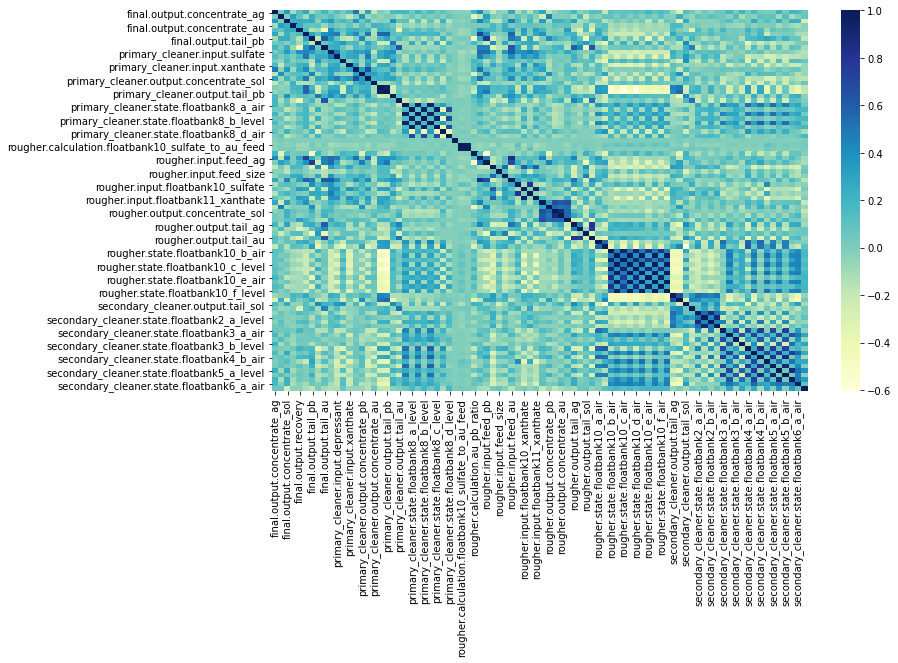


**************************************************
% Nan от  
**************************************************


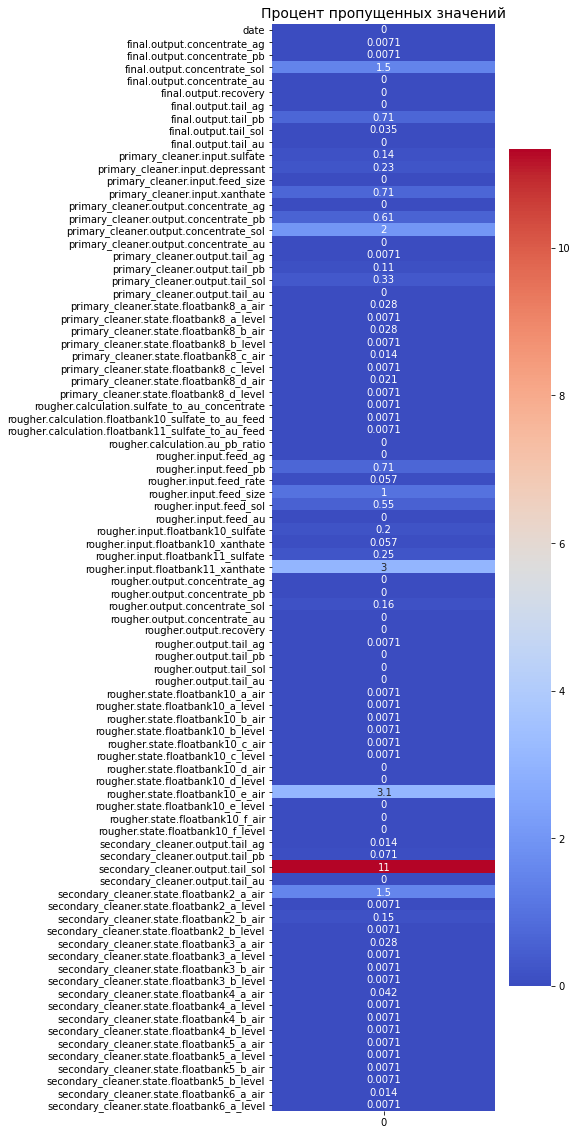

final.output.concentrate_sol                 1.491271
final.output.tail_pb                         0.706764
primary_cleaner.input.sulfate                0.141353
primary_cleaner.input.depressant             0.226164
primary_cleaner.input.xanthate               0.706764
primary_cleaner.output.concentrate_pb        0.607817
primary_cleaner.output.concentrate_sol       2.021344
primary_cleaner.output.tail_pb               0.106015
primary_cleaner.output.tail_sol              0.325111
rougher.input.feed_pb                        0.706764
rougher.input.feed_size                      1.017740
rougher.input.feed_sol                       0.551276
rougher.input.floatbank10_sulfate            0.204961
rougher.input.floatbank11_sulfate            0.254435
rougher.input.floatbank11_xanthate           3.024949
rougher.output.concentrate_sol               0.155488
rougher.state.floatbank10_e_air              3.081490
secondary_cleaner.output.tail_sol           11.343558
secondary_cleaner.state.floa

In [5]:
explore_dataframe_text(dataset_train)

Много пропущенных значений в столбце secondary_cleaner.output.tail_sol - 11.3%   

Так же отмечу столбцы   
final.output.concentrate_sol                 1.49 %  
primary_cleaner.output.concentrate_sol       2.02 %    
rougher.input.feed_size                      1.02 %  
rougher.input.floatbank11_xanthate           3.02 %  
rougher.state.floatbank10_e_air              3.08 %  
Есть признаки которые имеют высокую линейную связь -> при использовании линейных моделей не забыть про регуляризацию 
  
Явных дублирующихся строк не вывлено  

Дата записана как строка - поменять  



**************************************************
Первые 5 строк датафрейма:
**************************************************


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



**************************************************
Информация о данных:
**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035



**************************************************
Кол-во дубликатов
**************************************************
0



**************************************************
Корреляция между признаками 
**************************************************


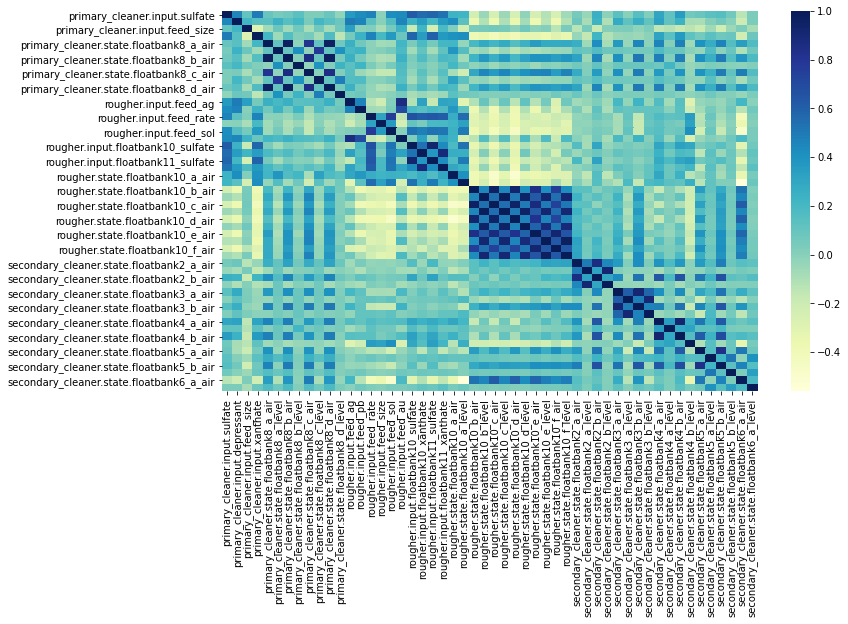


**************************************************
% Nan от  
**************************************************


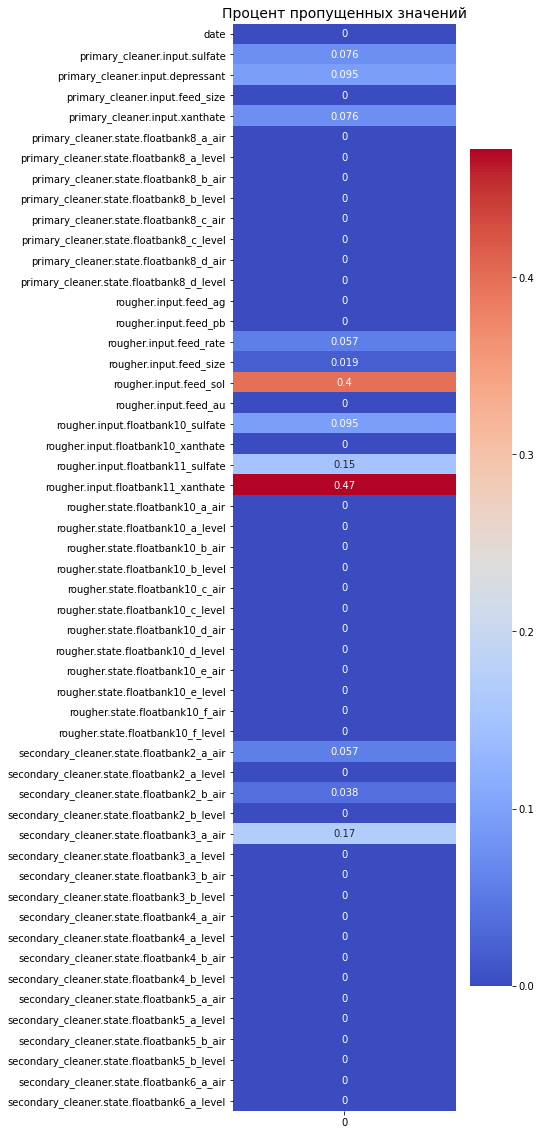

rougher.input.feed_sol                      0.396975
rougher.input.floatbank11_sulfate           0.151229
rougher.input.floatbank11_xanthate          0.472590
secondary_cleaner.state.floatbank3_a_air    0.170132
dtype: float64



In [6]:
explore_dataframe_text(dataset_test)

По сравнению  с прошлым дф, здесь куда меньше процент пропущенных значений, большинство столбцов их не имеют  
  
Отмечу столбцы     

rougher.input.feed_sol                      0.396975%  
rougher.input.floatbank11_sulfate           0.151229%   
rougher.input.floatbank11_xanthate          0.472590%  
secondary_cleaner.state.floatbank3_a_air    0.170132%  

Есть признаки которые имеют высокую линейную связь -> при использовании линейных моделей не забыть про регуляризацию   
  
Явных дублирующихся строк не вывлено    
  
Дата записана как строка - поменять    


**************************************************
Первые 5 строк датафрейма:
**************************************************


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



**************************************************
Информация о данных:
**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb            

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906



**************************************************
Кол-во дубликатов
**************************************************
0



**************************************************
Корреляция между признаками 
**************************************************


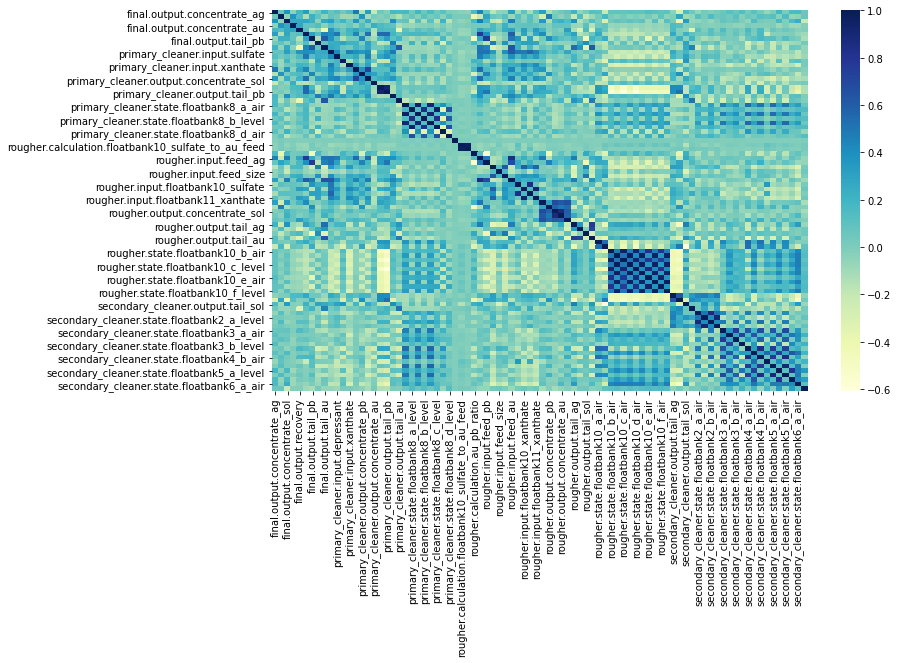


**************************************************
% Nan от  
**************************************************


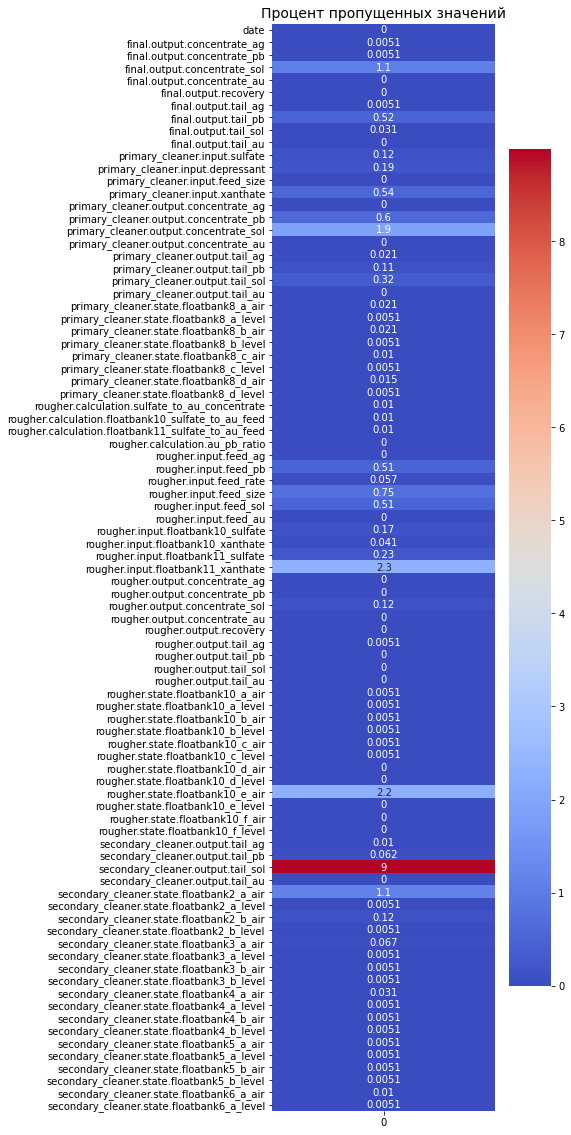

final.output.concentrate_sol                1.085447
final.output.tail_pb                        0.519574
primary_cleaner.input.sulfate               0.123463
primary_cleaner.input.depressant            0.190339
primary_cleaner.input.xanthate              0.535007
primary_cleaner.output.concentrate_pb       0.596739
primary_cleaner.output.concentrate_sol      1.903390
primary_cleaner.output.tail_pb              0.108030
primary_cleaner.output.tail_sol             0.318946
rougher.input.feed_pb                       0.514430
rougher.input.feed_size                     0.745923
rougher.input.feed_sol                      0.509285
rougher.input.floatbank10_sulfate           0.174906
rougher.input.floatbank11_sulfate           0.226349
rougher.input.floatbank11_xanthate          2.330367
rougher.output.concentrate_sol              0.118319
rougher.state.floatbank10_e_air             2.242914
secondary_cleaner.output.tail_sol           8.992232
secondary_cleaner.state.floatbank2_a_air    1.

In [7]:
explore_dataframe_text(dataset_full)

Много пропущенных значений в столбце secondary_cleaner.output.tail_sol - 8.99%   

Так же отмечу столбцы   
secondary_cleaner.state.floatbank2_a_air    1.131745   
rougher.state.floatbank10_e_air             2.242914   
rougher.input.floatbank11_xanthate          2.330367  
primary_cleaner.output.concentrate_sol      1.903390   
primary_cleaner.input.xanthate              0.535007  
primary_cleaner.output.concentrate_pb       0.596739  
final.output.tail_pb                        0.519574    
final.output.concentrate_sol                1.085447  
Есть признаки которые имеют высокую линейную связь -> при использовании линейных моделей не забыть про регуляризацию   
      
Явных дублирующихся строк не вывлено    
  
Дата записана как строка - поменять    

### Проверка рассчета эффективности обогащения

$$Recovery = \frac{C*(F-T)}{F*(C-T)} * 100\%$$

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [8]:
C = dataset_train['rougher.output.concentrate_au']
T = dataset_train['rougher.output.tail_au']
F = dataset_train['rougher.input.feed_au']

In [9]:
recovery = C*(F-T)/(F*(C-T))*100

In [10]:
mean_absolute_error(dataset_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Абсолютная ошибка имеет множитель 10**(-15), что делает ее ничтожно малой -> проверка проблем не выявила 

### анализ признаков недоступных  в тестовой выборке

In [11]:
unavailable = dataset_train.loc[:,~dataset_train.columns.isin(dataset_test.columns)].columns

In [12]:
unavailable

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [13]:
categories = {'rougher': 'флотация',
              'primary_cleaner': 'первичная очистка',
              'secondary_cleaner': 'вторичная очистка',
              'final': 'финальные характеристики'}
types = {'input': 'параметры сырья',
         'output': 'параметры продукта',
         'state': 'параметры, характеризующие текущее состояние этапа',
         'calculation': 'расчётные характеристики'}
features_by_category = {}

for feature in unavailable:
    blocks = feature.split('.')
    if len(blocks) == 3:
        stage, data_type, name = blocks
        category = categories.get(stage, 'некатегоризированные данные')
        data_type = types.get(data_type, 'неизвестный тип данных')
        if category not in features_by_category:
            features_by_category[category] = {}
        if data_type not in features_by_category[category]:
            features_by_category[category][data_type] = []
        features_by_category[category][data_type].append(feature)

for category, data_types in features_by_category.items():
    print(f'Категория: {category}')
    for data_type, features in data_types.items():
        print(f' Тип данных: {data_type}')
        for feature in features:
            print(f'  - {feature}')
    print()

Категория: финальные характеристики
 Тип данных: параметры продукта
  - final.output.concentrate_ag
  - final.output.concentrate_pb
  - final.output.concentrate_sol
  - final.output.concentrate_au
  - final.output.recovery
  - final.output.tail_ag
  - final.output.tail_pb
  - final.output.tail_sol
  - final.output.tail_au

Категория: первичная очистка
 Тип данных: параметры продукта
  - primary_cleaner.output.concentrate_ag
  - primary_cleaner.output.concentrate_pb
  - primary_cleaner.output.concentrate_sol
  - primary_cleaner.output.concentrate_au
  - primary_cleaner.output.tail_ag
  - primary_cleaner.output.tail_pb
  - primary_cleaner.output.tail_sol
  - primary_cleaner.output.tail_au

Категория: флотация
 Тип данных: расчётные характеристики
  - rougher.calculation.sulfate_to_au_concentrate
  - rougher.calculation.floatbank10_sulfate_to_au_feed
  - rougher.calculation.floatbank11_sulfate_to_au_feed
  - rougher.calculation.au_pb_ratio
 Тип данных: параметры продукта
  - rougher.outpu

В тестовом наборе нет целевых признаков.

К рассчетным характеристикам относятся :   
  - rougher.calculation.sulfate_to_au_concentrate  
  - rougher.calculation.floatbank10_sulfate_to_au_feed  
  - rougher.calculation.floatbank11_sulfate_to_au_feed  
Все остальные - к параметрам  
  
- В test у финального этапа и этапа флотации отсутствуют признаки обогащения
- В test отсутствуют данные о некоторых реагентах на этапе флотации


В train есть признаки, которые недоступны в test :
- Данные, которые отсутствуют в тестовой выборке на момент начала процесса моделируют реальные условия, что их у нас нет на этапе начала работы модели в проде. Если у нас уже будут эти данные, то мы сможем просто посчитать прогноз по формуле, и не будет необходимости применять алгоритм машинного обучения.  (замеры позже у них)

### Предобработка

In [14]:
y_true = dataset_test.merge(dataset_full ,on = 'date') # сразу сделаю объединение по дате теста и полного дф 

In [15]:
dataset_train['date'] = dataset_train['date'].astype('datetime64[M]')
dataset_test['date'] = dataset_test['date'].astype('datetime64[M]')
dataset_full['date'] = dataset_full['date'].astype('datetime64[M]')

In [16]:
dataset_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-01,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-01,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-01,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-01,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-01,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-01,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-01,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-01,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-01,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


**Вывод:** 
1) Много пропущенных значений в столбце secondary_cleaner.output.tail_sol - 11.3%
2) Изучили общую информацию о тренировочной, тестовой и общей выборках   
3) Была выполнена проверка рассчета эффективности обогащения   
    3.1) Итог проверки - рассчет был верен    
4) Были проанализированы данные недоступные в тестовой выборке   
5) Частично была выполнена предобработка, остальая часть будет сделана на этапе создания пайплайна и применения трансформеров



## Анализ данных

### Изменение концентрации элементов на каждом этапе

**rougher.input.feed_** — концентрация в сырье  
**rougher.output.concentrate_** — концентрация в черновом концентрате  
**primary_cleaner.output.concentrate_** - концентрация в концентрате после первичной очистки   
**final.output.concentrate_** —концентрация в финальном концентрате   

In [17]:
concentration = {
    'in_raw_materials' : [
        'rougher.input.feed_au',
        'rougher.input.feed_ag',
        'rougher.input.feed_pb',
        'rougher.input.feed_sol'
    ], 
    'in_the_draft' : [
        'rougher.output.concentrate_au',
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb',
        'rougher.output.concentrate_sol'
    ],
    'after_primary_purification' : [
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb',
        'primary_cleaner.output.concentrate_sol'
    ],
    'in_the_final_concentrate' : [
        'final.output.concentrate_au',
        'final.output.concentrate_ag',
        'final.output.concentrate_pb',
        'final.output.concentrate_sol'
    ]
}
titles = ['концентрация в сырье ', ]

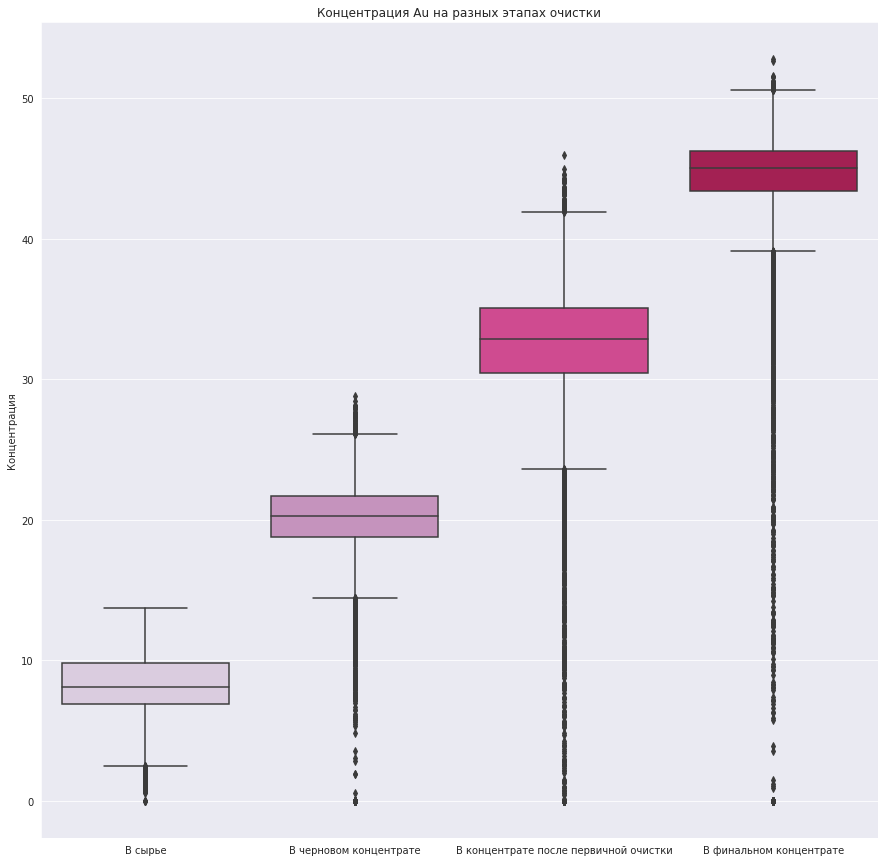

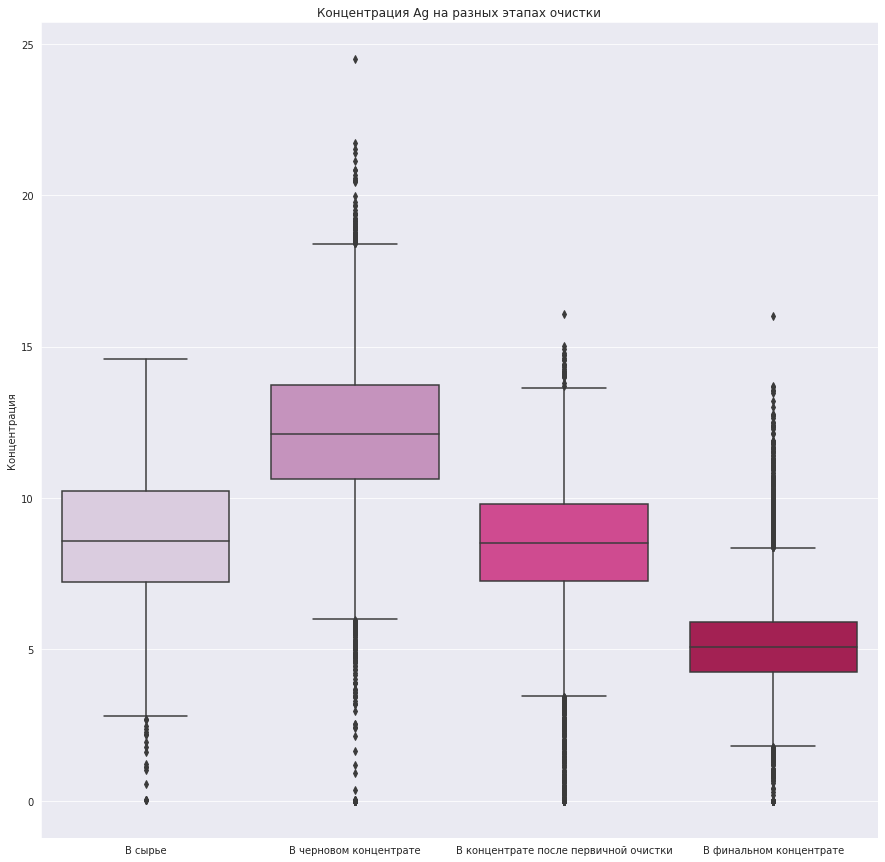

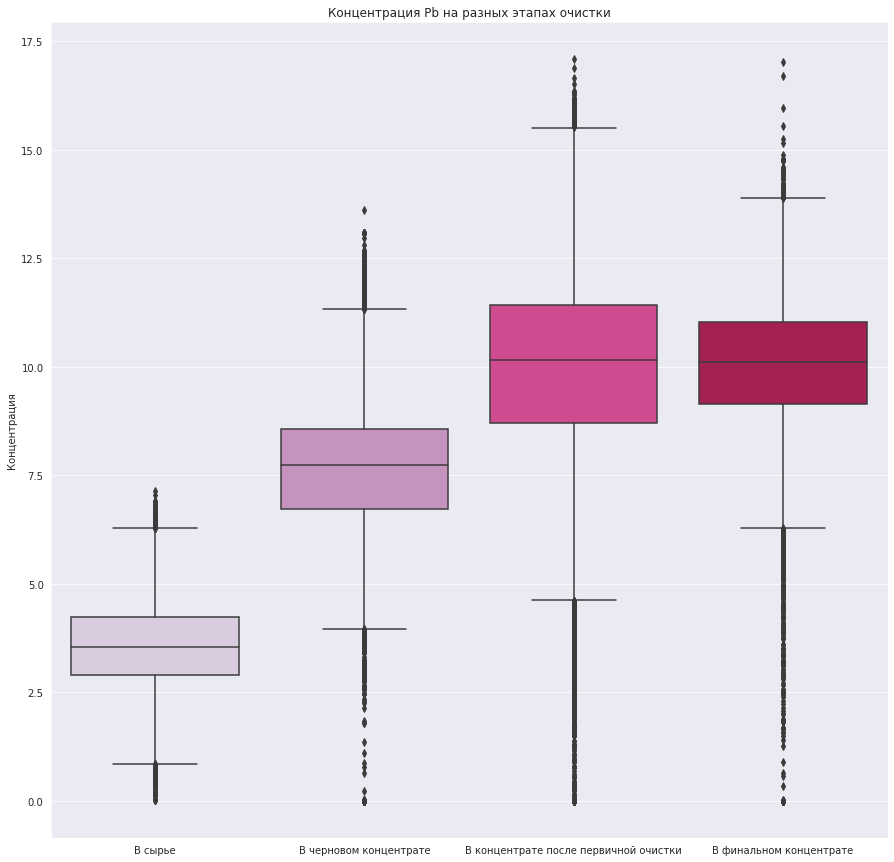

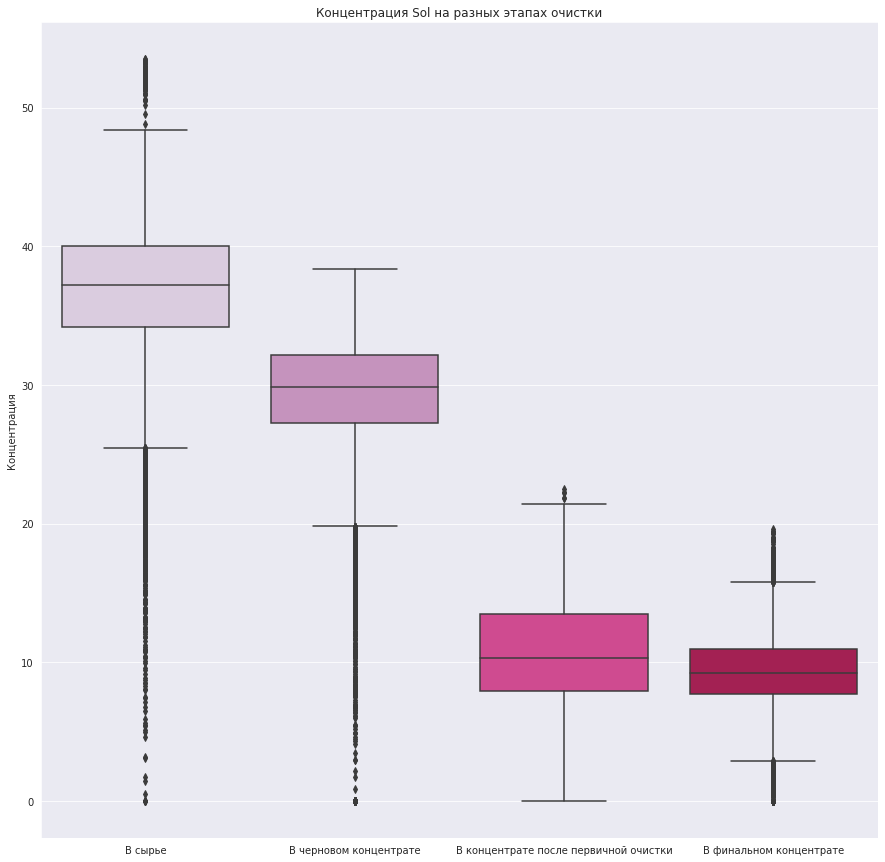

In [18]:
met = ['Au','Ag','Pb','Sol']
stage = ['В сырье', 'В черновом концентрате', 'В концентрате после первичной очистки', 'В финальном концентрате']
for i in range(4):
    fig = plt.figure(figsize=(15, 15))
    sns.set_style('darkgrid')
    sns.boxplot(data=dataset_full.loc[:,
                                        [concentration['in_raw_materials'][i], 
                                         concentration['in_the_draft'][i],
                                         concentration['after_primary_purification'][i],
                                         concentration['in_the_final_concentrate'][i]
                                        ]
                                    ], palette='PuRd')
    plt.title(f'Концентрация {met[i]} на разных этапах очистки')
    plt.xticks(range(4), stage)
    
    plt.ylabel('Концентрация')
    #plt.ylim(0, 20.0) 
    plt.show()

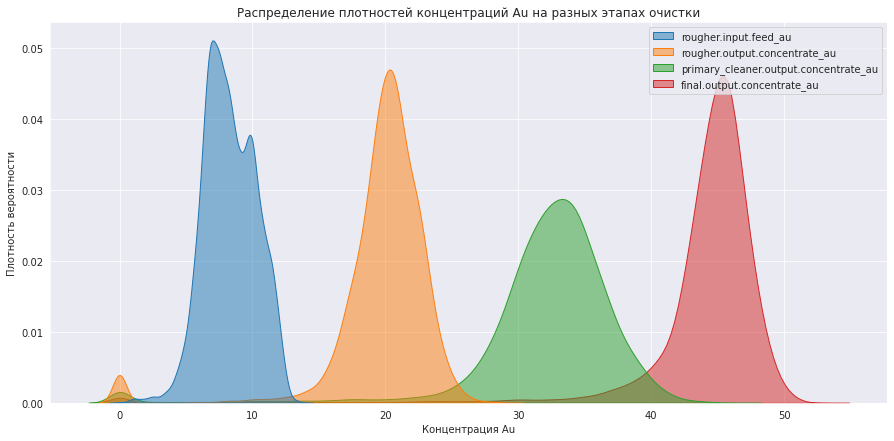

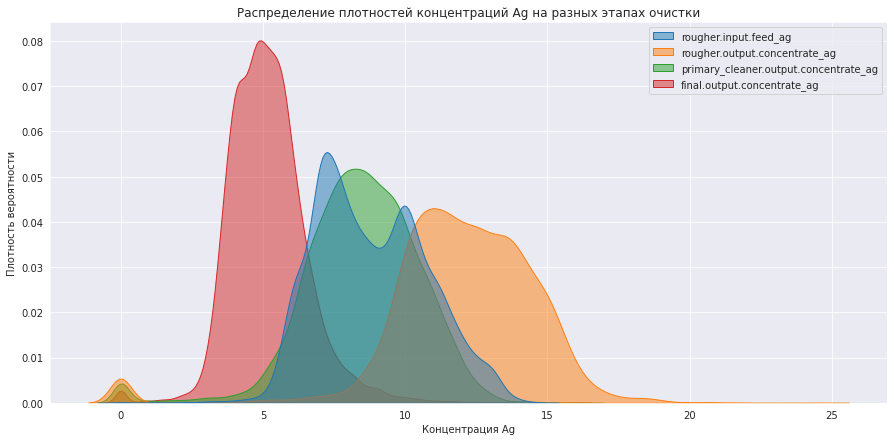

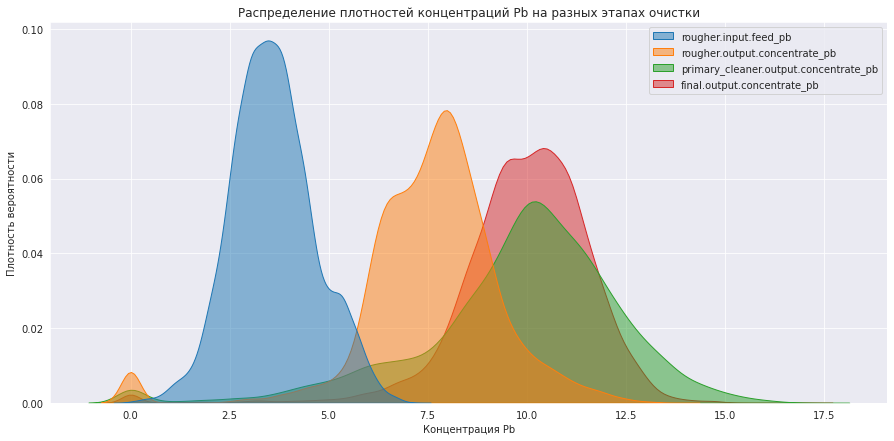

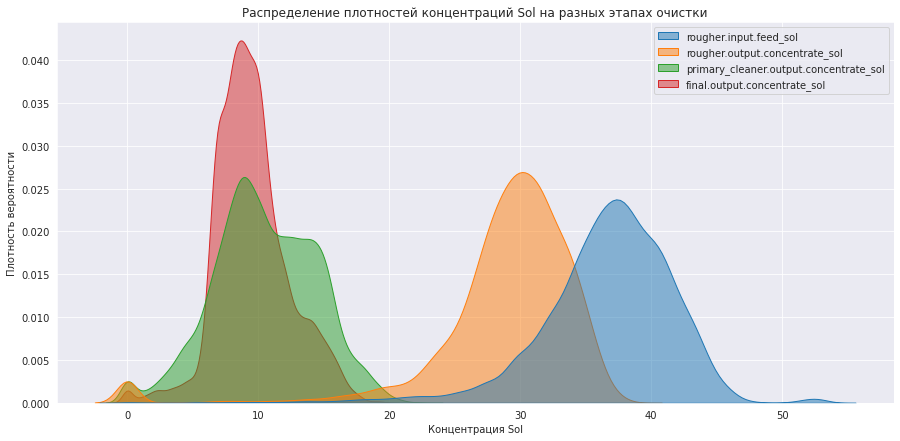

In [19]:

for i in range(4):
    fig = plt.figure(figsize=(15, 7))
    sns.set_style('darkgrid')
    sns.kdeplot(data=dataset_full.loc[:,
                                        [concentration['in_raw_materials'][i], 
                                         concentration['in_the_draft'][i],
                                         concentration['after_primary_purification'][i],
                                         concentration['in_the_final_concentrate'][i]
                                        ]
                                    ], fill=True, alpha=.5)
    plt.title(f'Распределение плотностей концентраций {met[i]} на разных этапах очистки')
    plt.xlabel(f'Концентрация {met[i]}')
    
    plt.ylabel('Плотность вероятности')
    #plt.ylim(0, 20.0) 
    plt.show()

****

Из предоставленных графиков  видно, что концентрации золота (Au), серебра (Ag) и свинца (Pb) увеличиваются от начала до конца процесса очистки руды. 

На этапе флотации (rougher) медианы концентраций золота, серебра и свинца составляют 8, 8 и 3.5 соответственно. На этапе первичной очистки (primary cleaner) медианы концентраций золота, серебра и свинца увеличиваются до 20, 13 и 7.5, соответственно. На этапе вторичной очистки (secondary cleaner) медианы концентраций золота и свинца дальше увеличиваются и составляют 33 и 10 соответственно, в то время как серебра стало как на первом этапе. На этапе финальной очистки (final) медианы концентраций золота и свинца достигают максимальных значений и составляют 45 и 10 соответственно, в то время как серебра стало - 5.

Концентрация растворенных веществ (Sol), с другой стороны, уменьшается от начала до конца процесса очистки руды. Медиана концентрации растворенных веществ на этапе флотации составляет 38, на первичной очистке - 30, на вторичной очистке - 10, и на финальной очистке - 9.

### Распределение размеров гранул сырья


rougher.input.feed_size - размер гранул исходного сырья   
primary_cleaner.input.feed_size - размер гранул при первичной очистке  


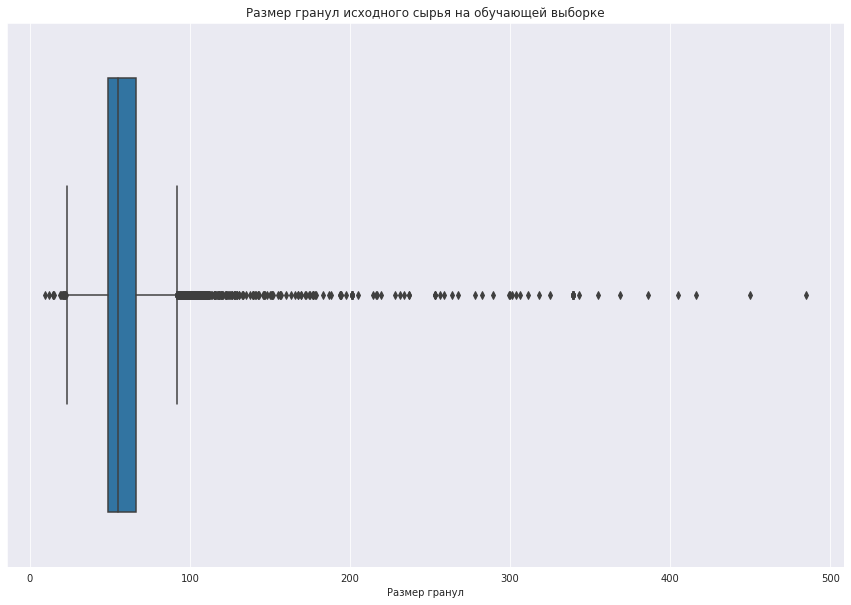

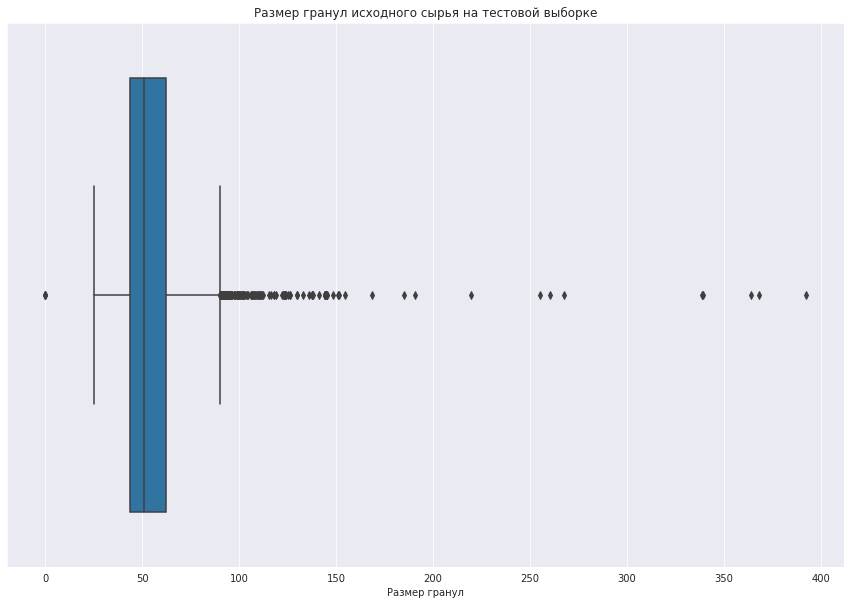

In [20]:
plt.figure(figsize=(15,10))
plt.title('Размер гранул исходного сырья на обучающей выборке')


sns.boxplot(data=dataset_train, x='rougher.input.feed_size')
plt.xlabel('Размер гранул');


plt.figure(figsize=(15,10))
plt.title('Размер гранул исходного сырья на тестовой выборке')


sns.boxplot(data=dataset_test, x='rougher.input.feed_size')
plt.xlabel('Размер гранул');


Слишком много значений вне "усов" -> уберем их чтобы посмотреть как распределены основные данные

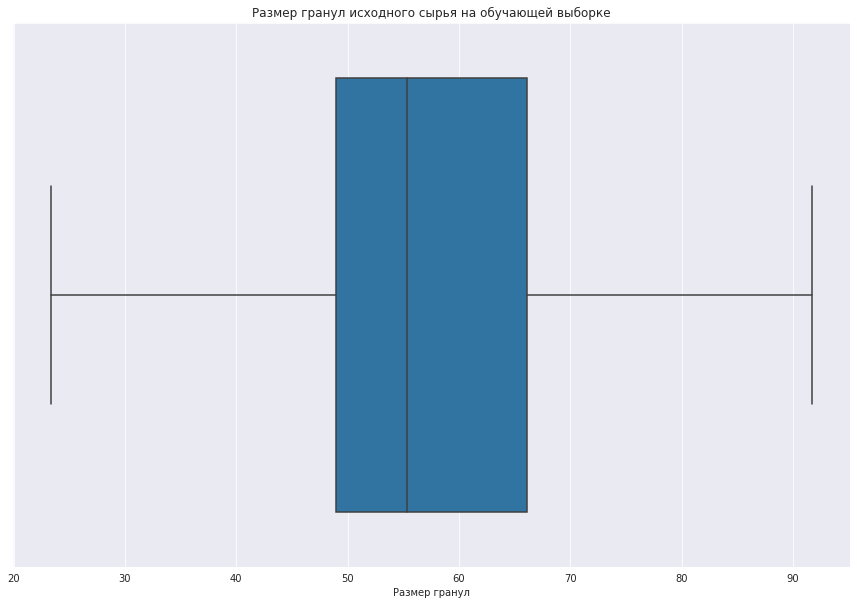

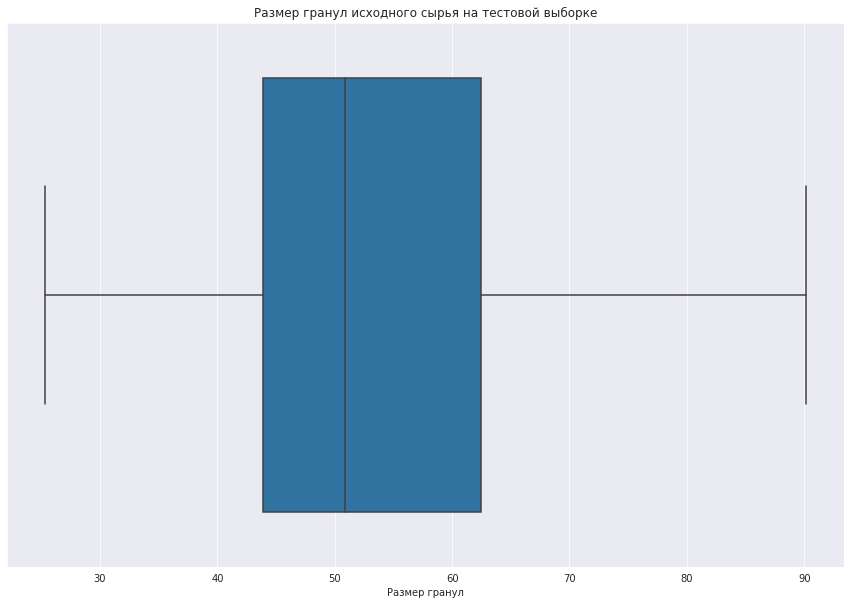

In [21]:
plt.figure(figsize=(15,10))
plt.title('Размер гранул исходного сырья на обучающей выборке')
sns.boxplot(data=dataset_train, x='rougher.input.feed_size',showfliers=False)
plt.xlabel('Размер гранул');


plt.figure(figsize=(15,10))
plt.title('Размер гранул исходного сырья на тестовой выборке')
sns.boxplot(data=dataset_test, x='rougher.input.feed_size',showfliers=False)
plt.xlabel('Размер гранул');

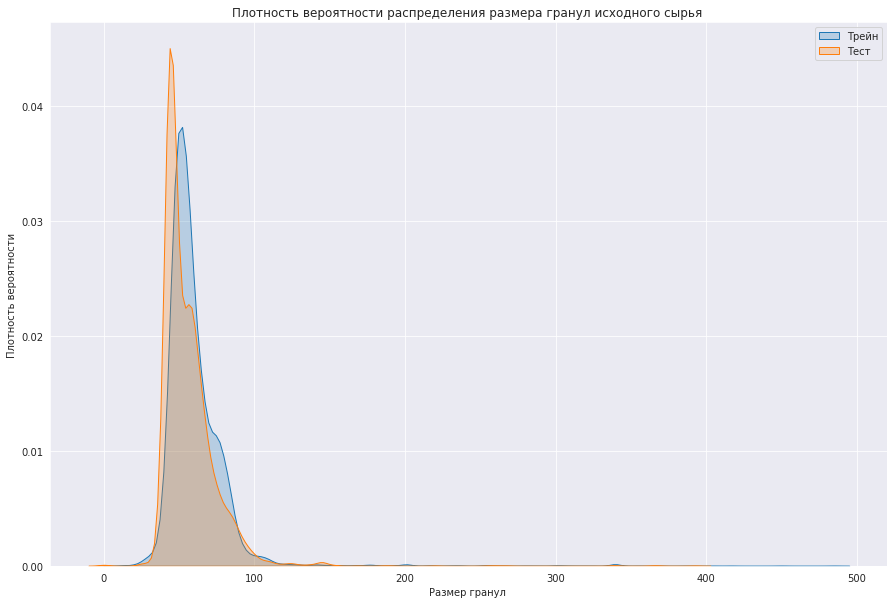

In [22]:
plt.figure(figsize=(15,10))
plt.title('Плотность вероятности распределения размера гранул исходного сырья ')
plt.xlabel('Pазмер гранул ')
plt.ylabel('Плотность вероятности')
sns.kdeplot(data=dataset_train, x='rougher.input.feed_size',fill=True)
sns.kdeplot(data=dataset_test, x='rougher.input.feed_size',fill=True)
plt.legend(['Трейн','Тест']);

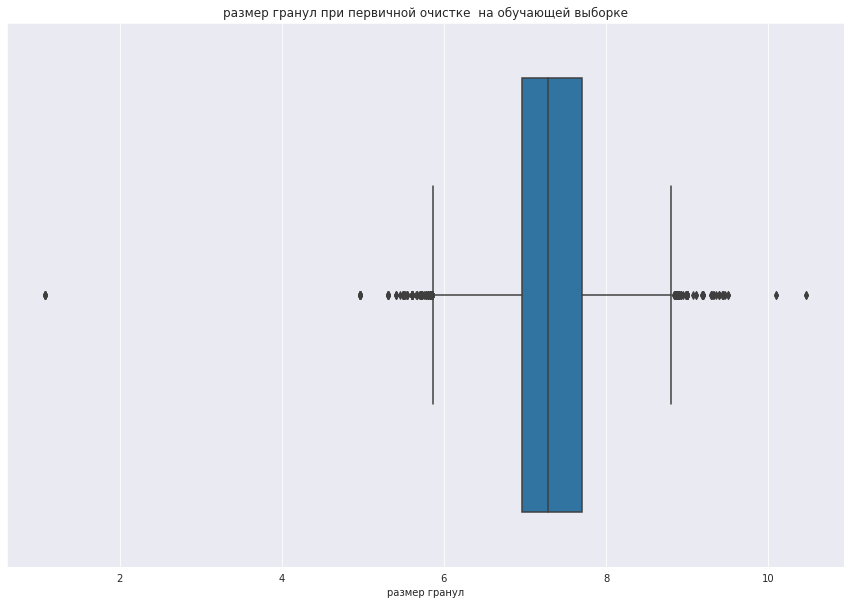

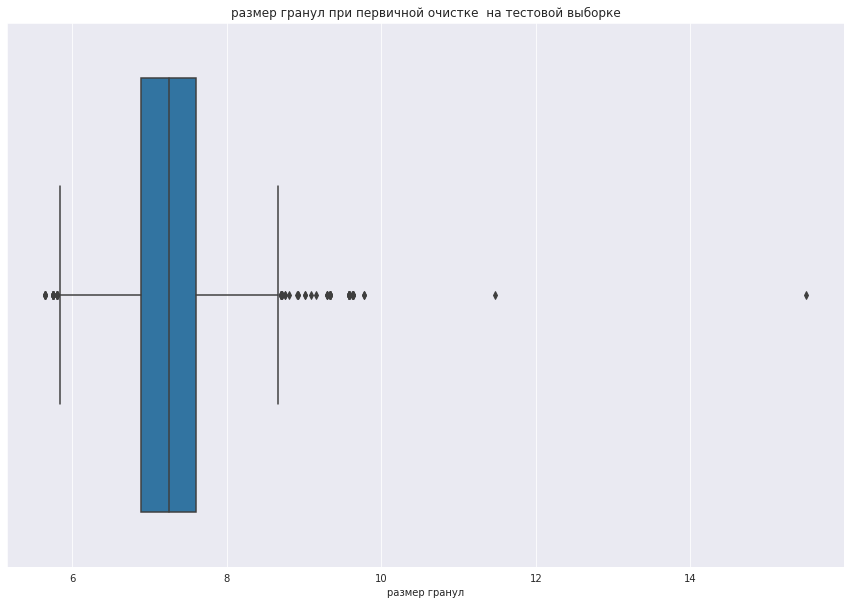

In [23]:
plt.figure(figsize=(15,10))
plt.title('размер гранул при первичной очистке  на обучающей выборке')

sns.boxplot(data=dataset_train, x='primary_cleaner.input.feed_size')
plt.xlabel('размер гранул');
plt.figure(figsize=(15,10))
plt.title('размер гранул при первичной очистке  на тестовой выборке')

sns.boxplot(data=dataset_test, x='primary_cleaner.input.feed_size')
plt.xlabel('размер гранул');

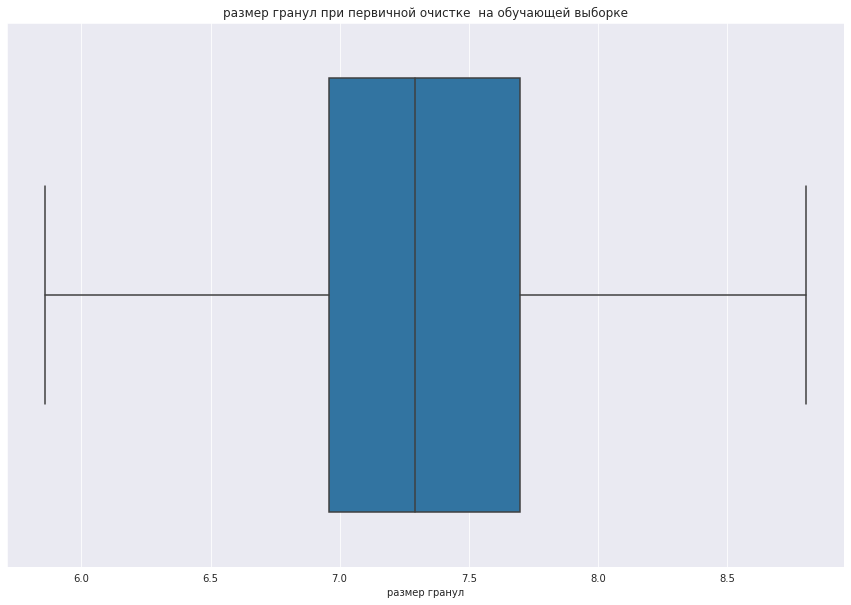

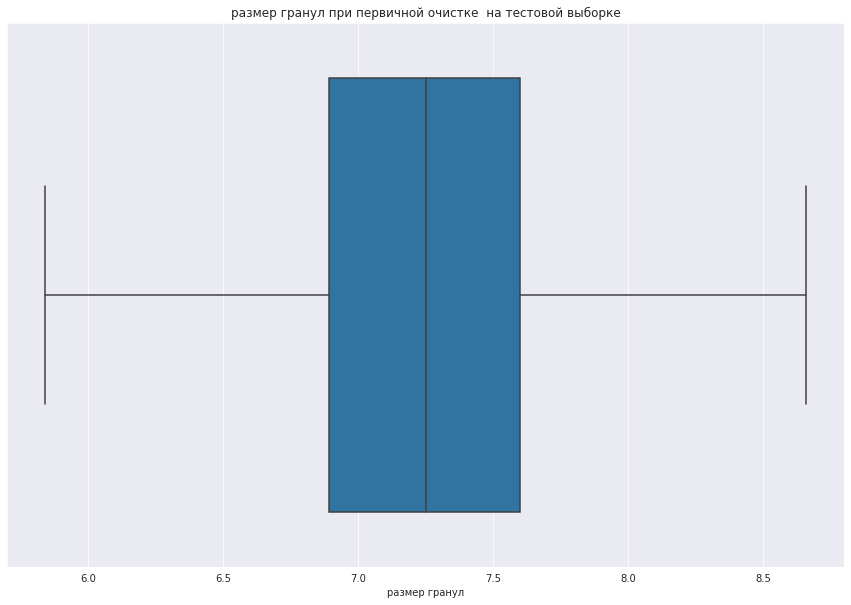

In [24]:
plt.figure(figsize=(15,10))
plt.title('размер гранул при первичной очистке  на обучающей выборке')

sns.boxplot(data=dataset_train, x='primary_cleaner.input.feed_size',showfliers=False)
plt.xlabel('размер гранул');
plt.figure(figsize=(15,10))
plt.title('размер гранул при первичной очистке  на тестовой выборке')

sns.boxplot(data=dataset_test, x='primary_cleaner.input.feed_size',showfliers=False)
plt.xlabel('размер гранул');

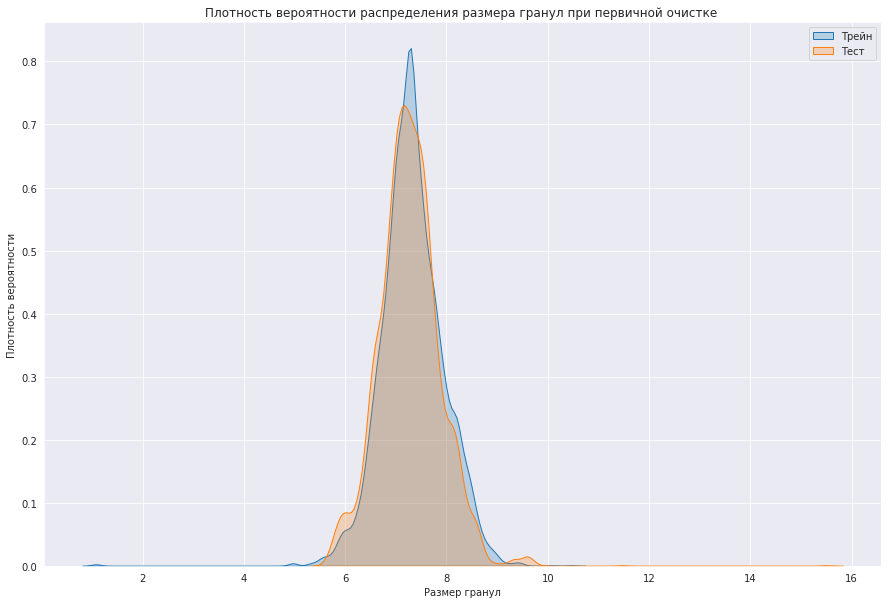

In [25]:
plt.figure(figsize=(15,10))
plt.title('Плотность вероятности распределения размера гранул при первичной очистке ')

sns.kdeplot(data=dataset_train, x='primary_cleaner.input.feed_size',fill=True,legend=True)
sns.kdeplot(data=dataset_test, x='primary_cleaner.input.feed_size',fill=True,legend=True)
plt.xlabel('Размер гранул')
plt.ylabel('Плотность вероятности')
plt.legend(['Трейн','Тест']);

На основе проведенного анализа на этом этапе можно сделать следующие выводы:  

1. Количество выбросов значительно уменьшилось по распределению размеров гранул при первичной очистке primarycleaner.input.feedsize на обучающей и тестовой выборках. Распределение размеров гранул при первичной очистке стало иметь вид нормального распределения.  

2. Размер гранул при первичной очистке значительно уменьшился по сравнению с исходным сырьем, что может быть связано с работой технологических процессов на предшествующих этапах.  

3. Распределения размеров гранул сырья на обучающей и тестовой выборках для каждого этапа не сильно отличаются друг от друга, что говорит о том, что оценка модели будет правильной.  

### Суммарная концентрация веществ на разных стадиях

In [26]:
concentration['in_raw_materials']

['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol']

In [27]:
df_au = dataset_full.loc[:,
                                        [concentration['in_raw_materials'][0], 
                                         concentration['in_the_draft'][0],
                                         concentration['after_primary_purification'][0],
                                         concentration['in_the_final_concentrate'][0],
                                         'date'
                                        ]
                                    ]
df_ag = dataset_full.loc[:,
                                        [concentration['in_raw_materials'][1], 
                                         concentration['in_the_draft'][1],
                                         concentration['after_primary_purification'][1],
                                         concentration['in_the_final_concentrate'][1],
                                         'date'
                                        ]
                                    ]
df_pb = dataset_full.loc[:,
                                        [concentration['in_raw_materials'][2], 
                                         concentration['in_the_draft'][2],
                                         concentration['after_primary_purification'][2],
                                         concentration['in_the_final_concentrate'][2],
                                         'date'
                                        ]
                                    ]
df_sol = dataset_full.loc[:,
                                        [concentration['in_raw_materials'][3], 
                                         concentration['in_the_draft'][3],
                                         concentration['after_primary_purification'][3],
                                         concentration['in_the_final_concentrate'][3],
                                         'date'
                                        ]
                                    ]

In [28]:
df_sum = pd.concat([df_au.sum(axis=1), df_ag.sum(axis=1), df_pb.sum(axis=1), df_sol.sum(axis=1), df_au['date']], axis=1)

# Суммирование по столбцам

 Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [29]:
# Создание нового столбца с суммарной концентрацией на каждой стадии
dataset_full['total_concentration_rougher'] = dataset_full[['rougher.input.feed_au', 
                                                            'rougher.input.feed_ag', 
                                                            'rougher.input.feed_pb', 
                                                            'rougher.input.feed_sol']].sum(axis=1)

dataset_full['total_concentration_primary_cleaner'] = dataset_full[['primary_cleaner.output.concentrate_au', 
                                                                    'primary_cleaner.output.concentrate_ag', 
                                                                    'primary_cleaner.output.concentrate_pb', 
                                                                    'primary_cleaner.output.concentrate_sol']].sum(axis=1)

dataset_full['total_concentration_secondary_cleaner'] = dataset_full[['final.output.concentrate_au', 
                                                                      'final.output.concentrate_ag', 
                                                                      'final.output.concentrate_pb', 
                                                                      'final.output.concentrate_sol']].sum(axis=1)

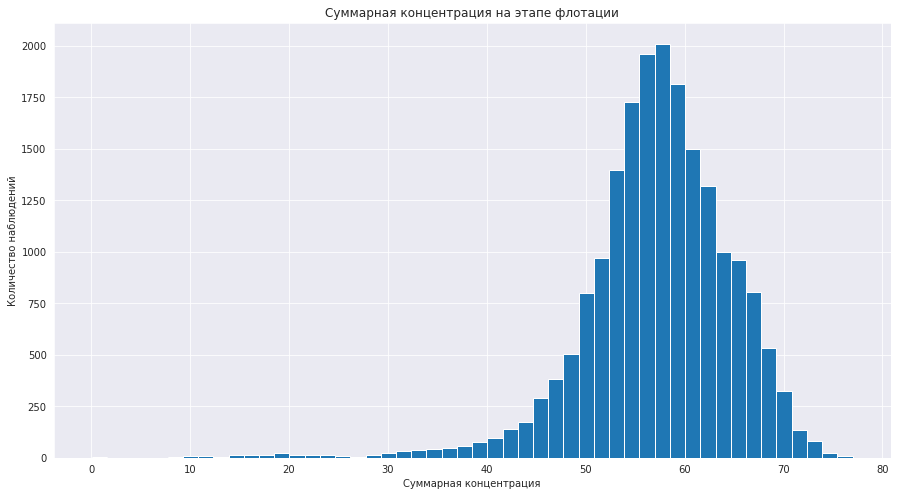

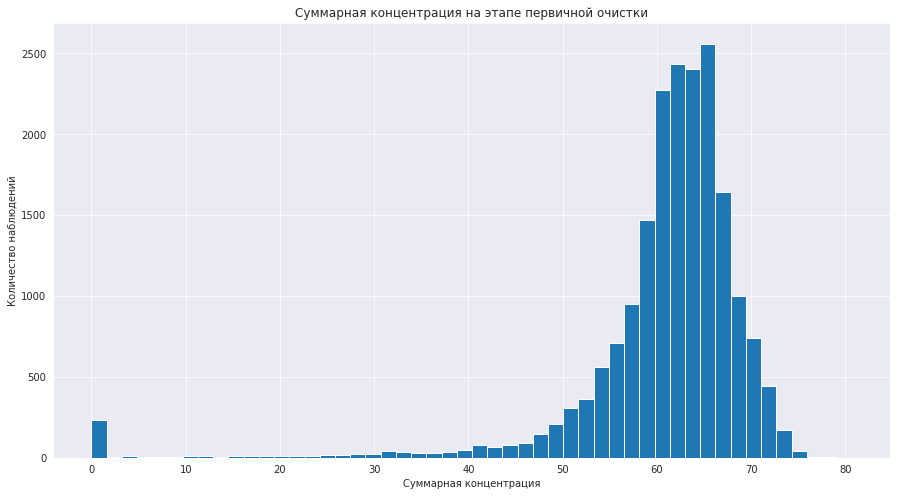

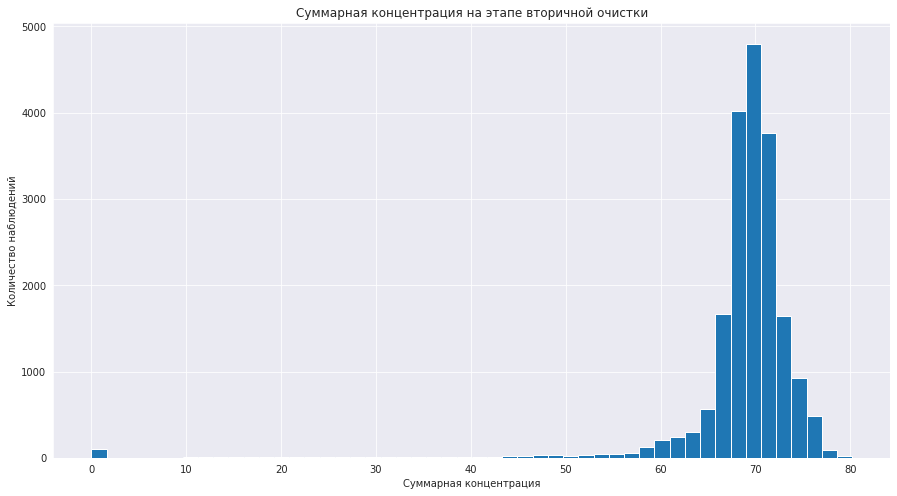

In [30]:
plt.figure(figsize=(15,8))
plt.hist(dataset_full['total_concentration_rougher'], bins=50)
plt.title('Суммарная концентрация на этапе флотации')
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество наблюдений')
plt.show()

plt.figure(figsize=(15,8))
plt.hist(dataset_full['total_concentration_primary_cleaner'], bins=50)
plt.title('Суммарная концентрация на этапе первичной очистки')
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество наблюдений')
plt.show()

plt.figure(figsize=(15,8))
plt.hist(dataset_full['total_concentration_secondary_cleaner'], bins=50)
plt.title('Суммарная концентрация на этапе вторичной очистки')
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество наблюдений')
plt.show()

Суммарная концентрация увеличивается на каждом этапе обработки

Есть какой-то локальный пик в 0, но будет учтено в пайплайне 

In [31]:
def outlier_func(data) : 
    data_wt_nul = data.drop(data[data['rougher.input.feed_au'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.input.feed_ag'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.input.feed_pb'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.input.feed_sol'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.output.concentrate_au'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.output.concentrate_ag'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.output.concentrate_pb'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['rougher.output.concentrate_sol'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['primary_cleaner.output.concentrate_au'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['primary_cleaner.output.concentrate_ag'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['primary_cleaner.output.concentrate_pb'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['primary_cleaner.output.concentrate_sol'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['final.output.concentrate_au'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['final.output.concentrate_ag'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['final.output.concentrate_pb'] < 1].index, axis = 0)
    data_wt_nul = data_wt_nul.drop(data_wt_nul[data_wt_nul['final.output.concentrate_sol'] < 1].index, axis = 0).reset_index()
    data_wt_nul = data_wt_nul.drop('index', axis = 1)
    return data_wt_nul


In [32]:
len(dataset_train)

14149

In [33]:
dataset_train = outlier_func(dataset_train)

In [34]:
len(dataset_train)

13426

1. Был проведен анализ изменения концентрации металлов на различных этапах очистки руды. Это позволило понять, как изменяется концентрация металлов в процессе очистки, и выявить этапы, на которых происходит наибольшее увеличение концентрации.

2. Был проведен анализ распределения размеров гранул сырья на обучающей и тестовой выборках. Было обнаружено, что распределения мало отличаются друг от друга, что говорит о том, что модель, обученная на обучающей выборке, будет оценена правильно на тестовой выборке.

3. Был проведен анализ на суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Это позволило выявить аномальные значения и выбросы, которые могут повлиять на качество модели. Было принято решение удалить эти значения из обучающей выборки для повышения качества обучения модели.

## Модель

In [35]:
def loss_smape(predict_pr, true_values): 
    err = abs(predict_pr - true_values)
    scale = (abs(true_values) + abs(predict_pr))/2
    return  np.mean(err/scale)*100

In [36]:
def smape(rough, final):
    score_final = 0.25*rough + 0.75*final
    return score_final

ОЧистим трейн от столбцов которых нет в тесте

In [39]:
normalizer = StandardScaler()
imputer = KNNImputer()

In [40]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_knn = KNeighborsRegressor()

pipline = make_imblearn_pipeline(imputer ,normalizer, model_lr)

smape_scorer = make_scorer(loss_smape, greater_is_better = False)
alphas = alphas = np.linspace(0.1, 4, num=4)
param_grid = [
    {'linearregression': [model_rf],
        'linearregression__n_estimators': [i for i in range(80, 120, 10)], 
        'linearregression__max_depth': [i for i in range(3, 7)]}, 
    {'linearregression': [model_knn], 
             'linearregression__n_neighbors': [i for i in range(5, 11)]}
]
gcv = RandomizedSearchCV(pipline, param_distributions=param_grid, cv=3, scoring=smape_scorer,n_jobs=-1, verbose=10,random_state=42)

In [38]:
X = dataset_train.loc[:, dataset_test.columns].drop('date',axis=1)
y = dataset_train['rougher.output.recovery']

Черновой

In [42]:
gcv.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 1/3; 1/10] END linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80;, score=-8.832 total time=   9.2s
[CV 2/3; 1/10] START linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 2/3; 1/10] END linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80;, score=-6.927 total time=   9.3s
[CV 3/3; 1/10] START linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 3/3; 1/10] END linearregression=RandomForestRegressor(random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80;, score=-7.894 tota

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('linearregression',
                                              LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'linearregression': [RandomForestRegressor(max_depth=3,
                                                                                    n_estimators=110,
                                                                                    random_state=42)],
                                         'linearregression__max_depth': [3, 4,
                                                                         5, 6],
                                         'linearregression__n_estimators': [80,
                                                                            90,
                                                                            100,
                                                                            110]},
                                        {'linearregression': [KNeighborsRegressor()],
                                         'linearregression__n_neighbors': [5, 6,
                                                                           7, 8,
                                                                           9,
                                                                           10]}],
                   random_state=42,
                   scoring=make_scorer(loss_smape, greater_is_better=False),
                   verbose=10)

In [43]:
print(f'Лучшая модель (rougher): {gcv.best_params_}') 

Лучшая модель (rougher): {'linearregression__n_estimators': 110, 'linearregression__max_depth': 3, 'linearregression': RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42)}


In [44]:
print(f'Лучшее значение = {gcv.best_score_ * (-1)}')

Лучшее значение = 7.879803726424822


In [45]:
y = dataset_train['final.output.recovery']

Финал

In [46]:
gcv_final = RandomizedSearchCV(pipline, 
                               param_distributions=param_grid, 
                               cv=3, scoring=smape_scorer,
                               n_jobs=-1, 
                               verbose=10,
                               random_state=42)

In [47]:
gcv_final.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START linearregression=RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 1/3; 1/10] END linearregression=RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80;, score=-8.910 total time=   8.9s
[CV 2/3; 1/10] START linearregression=RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 2/3; 1/10] END linearregression=RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80;, score=-9.230 total time=   9.2s
[CV 3/3; 1/10] START linearregression=RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42), linearregression__max_depth=3, linearregression__n_estimators=80
[CV 3

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('linearregression',
                                              LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'linearregression': [RandomForestRegressor(max_depth=6,
                                                                                    n_estimators=90,
                                                                                    random_state=42)],
                                         'linearregression__max_depth': [3, 4,
                                                                         5, 6],
                                         'linearregression__n_estimators': [80,
                                                                            90,
                                                                            100,
                                                                            110]},
                                        {'linearregression': [KNeighborsRegressor()],
                                         'linearregression__n_neighbors': [5, 6,
                                                                           7, 8,
                                                                           9,
                                                                           10]}],
                   random_state=42,
                   scoring=make_scorer(loss_smape, greater_is_better=False),
                   verbose=10)

In [48]:
print('Лучшая модель (final):') 
gcv_final.best_params_

Лучшая модель (final):


{'linearregression__n_estimators': 90,
 'linearregression__max_depth': 6,
 'linearregression': RandomForestRegressor(max_depth=6, n_estimators=90, random_state=42)}

In [49]:
print(f'Лучшее значение = {gcv_final.best_score_ * (-1)}')

Лучшее значение = 9.971976402057743


In [50]:
gcv_pr = gcv.predict(dataset_test.drop('date', axis=1))
gcv_pr

array([85.23387613, 85.23387613, 85.23387613, ..., 90.70278632,
       90.70278632, 90.70278632])

In [51]:
gcv_final_pr = gcv_final.predict(dataset_test.drop('date', axis=1))
gcv_final_pr

array([68.39667748, 68.36938918, 68.5757636 , ..., 70.6533499 ,
       70.41661014, 70.43330817])

Объединение по датам полного и тестевого датасета

In [39]:
y_true_rougher_output_recovery = y_true['rougher.output.recovery']

In [40]:
y_true_final_output_recovery = y_true['final.output.recovery']

Рассчет метрик

In [54]:
print(f'SMAPE_rougher = {loss_smape(gcv_pr,y_true_rougher_output_recovery)}')

SMAPE_rougher = 8.289422997776704


In [55]:
print(f'SMAPE_final = {loss_smape(gcv_final_pr,y_true_final_output_recovery)}')

SMAPE_final = 9.72509752746583


In [56]:
print('Итоговая SMAPE: ')
smape(loss_smape(gcv_pr,y_true_rougher_output_recovery),loss_smape(gcv_final_pr,y_true_final_output_recovery))

Итоговая SMAPE: 


9.366178895043548

Dummy-модель

In [41]:
model_dummy_rougher = DummyRegressor()
model_dummy_rougher.fit(X, dataset_train['rougher.output.recovery'])
preds_rougher = pd.Series(model_dummy_rougher.predict(dataset_test.drop('date', axis=1)))

smape_dummy_rougher = loss_smape(y_true_rougher_output_recovery, preds_rougher)

In [42]:
model_dummy_final = DummyRegressor()
model_dummy_final.fit(X, dataset_train['final.output.recovery'])
preds_final = pd.Series(model_dummy_final.predict(dataset_test.drop('date', axis=1)))

smape_dummy_final = loss_smape(y_true_final_output_recovery, preds_final)

In [43]:
print(f'SMAPE_dummy_rougher = {smape_dummy_rougher}')

SMAPE_dummy_rougher = 9.010432985231105


In [44]:
print(f'SMAPE_dummy_final = {smape_dummy_final}')

SMAPE_dummy_final = 10.060582696805547


In [45]:
print('Итоговая SMAPE_dummy: ')
smape(smape_dummy_rougher,smape_dummy_final)

Итоговая SMAPE_dummy: 


9.798045268911936

При проведении анализа было проверено несколько моделей регрессии на задаче прогнозирования целевой переменной. Модели, включенные в финальное исследование, включали в себя  случайный лес и метод k ближайших соседей.  
  
Наилучшее значение метрики  sMAPE 7.87 и 9.97 (на rougher и final соответственно) . 
Лучшие модели :      
RandomForestRegressor(max_depth=3, n_estimators=110, random_state=42)    
RandomForestRegressor(max_depth=6, n_estimators=90, random_state=42)     
   
   
Smape на rougher = 8.29  
Smape на final = 9.72   
Итоговая Smape = 9.36   

Прогнозы модели лучше наивного прогноза метрики оценки качества константной модели 